Colour maps
======
Colour maps can be specified with the colourmap() function

Calling colourmap() on a vis object loads a colourmap and applies it to that object in a single command.

It can also be called from the viewer object which just loads a colourmap and returns its id, which can be saved and used to set the "colourmap" property of a one or more or objects.



In [1]:
#First set up a basic vis so we can display the colourmaps
import lavavu
lv = lavavu.Viewer(border=False, axis=False, background="gray90", quality=3, fontscale=1.5)

**Specifying colour maps**

Maps can be loaded as strings or lists of colours, positions can optionally be provided in range [0,1] to set where on the scale the colour will be placed, eg:  
```
"red white blue"
"0.0=red 0.25=white 1.0=blue"
[(0.0, 'red'), (0.25, 'white'), (1.0, 'blue')]
['red', 'white', 'blue']  
```
To provide specific values for colours in their original scale (rather than positions normalized to [0,1] range), place the value in parenthesis instead, eg:  
```
"red (100)white (200)blue"
```  

When specifying colours you can use either:
 1. colour names from https://en.wikipedia.org/wiki/X11_color_names eg: 'red'
 2. RGB hex values such as '#ff0000'
 3. HTML style rgb(a) values, eg: 'rgb(255,0,0)' or 'rgba(255,0,0,1)'

Colour order and positions can be reversed by passing *reverse=True*.  
Pass *discrete=True* to produce a discrete colour map instead of a continuously varying one.  
*log=True* will apply a logarithmic scale.  
Addional properties to the colour map can be passed, for details see: https://lavavu.github.io/Documentation/Property-Reference#colourmap

**Colour bars**  

The colourbar() function creates a colour bar plot, it can be called from an object and uses that objects colour map, if called on the viewer it must have its map specified at some point with colourmap(data).

There are several properties that specify how the colour bar is displayed, see: https://lavavu.github.io/Documentation/Property-Reference#colourbar

In [1]:
#Create colour bar then load a colourmap into it
cbar1 = lv.colourbar(size=[0.95,15], align="top")
cbar1.colourmap([(0, 'green'), (0.75, 'yellow'), (1, 'red')], reverse=True)


"""0.0000=rgba(255,0,0,1)
 0.2500=rgba(255,255,0,1)
 1.0000=rgba(0,255,0,1)
 """

In [1]:
#Create another colour bar and load a map, this time with a log scale
cbar2 = lv.colourbar(size=[0.95,15], align="top", tickvalues=[20,50,100,200,500])
cbar2.colourmap('black (100)goldenrod (101)khaki white', range=[10,1000], logscale=True)


"""0.0000=rgba(0,0,0,1)
 0.5000=rgba(218,165,32,1)
 0.5022=rgba(240,230,140,1)
 1.0000=rgba(255,255,255,1)
 """


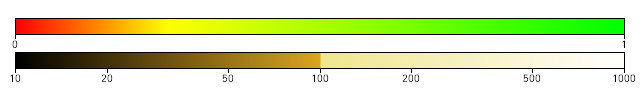

In [1]:
lv.display(resolution=[640,90], transparent=True)

In [1]:
print(cbar1)

{
  align="top"
  colourbar=true
  colourmap="colourbar_colourmap"
  name="colourbar"
  size=[0.95, 15]
  visible=true
}



**CubeHelix**

Custom [cube helix](https://www.mrao.cam.ac.uk/~dag/CUBEHELIX/) maps can be generated with cubehelix(), these will always have monotonically varying intensity values to be when printed in greyscale



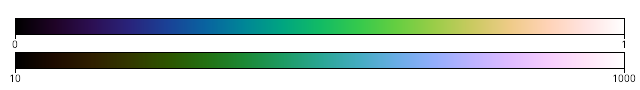


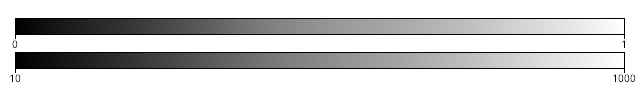

In [1]:
cbar1.colourmap(lavavu.cubehelix(samples=16, start=0.5, rot=-0.9, sat=1.0, gamma=1.0, alpha=False))
cbar2.colourmap(lavavu.cubehelix(samples=16, start=1.0, rot=0.9, sat=0.75, gamma=1.0, alpha=False), logscale=False)
cbar2["tickvalues"] = []

lv.display(resolution=[640,90], transparent=True)

#Display in greyscale
cbar1.colourmap(lavavu.cubehelix(samples=16, start=0.5, rot=-0.9, sat=1.0, gamma=1.0, alpha=False), monochrome=True)
cbar2.colourmap(lavavu.cubehelix(samples=16, start=1.0, rot=0.9, sat=0.75, gamma=1.0, alpha=False), monochrome=True)
lv.display(resolution=[640,90], transparent=True)

**Getting data**

Colourmap data can be retreived with .getcolourmap() on an object, which returns the map formatted as a string, .getcolourmap(string=False) returns a python list of (position, colour) tuples instead. Either of these formats are supported when creating a colourmap so the data can be modified and passed to a new colour map.

In [1]:
print(cbar1.getcolourmap())

"""0.0000=rgba(0,0,0,1); 0.0625=rgba(21,21,21,1); 0.1250=rgba(38,38,38,1); 0.1875=rgba(54,54,54,1); 0.2500=rgba(73,73,73,1); 0.3125=rgba(93,93,93,1); 0.3750=rgba(114,114,114,1); 0.4375=rgba(133,133,133,1); 0.5000=rgba(147,147,147,1); 0.5625=rgba(158,158,158,1); 0.6250=rgba(168,168,168,1); 0.6875=rgba(179,179,179,1); 0.7500=rgba(192,192,192,1); 0.8125=rgba(208,208,208,1); 0.8750=rgba(222,222,222,1); 0.9375=rgba(236,236,236,1); 1.0000=rgba(255,255,255,1); """



**CPT colour tables**

Most files in the Generic Map Tools CPT format can be imported.  
A large library of these can be found at [cpt-city](http://soliton.vm.bytemark.co.uk/pub/cpt-city/index.html)

The *positions=False* argument can be passed to ignore the position data and load only the colours.

In [1]:
try:
    #Check if file exists, if not download it from cpt-city
    import os
    fn = 'arctic.cpt'
    if not os.path.isfile(fn):
        import urllib
        url = 'http://soliton.vm.bytemark.co.uk/pub/cpt-city/arendal/arctic.cpt'
        urllib.urlretrieve(url, fn)
        
    #Load with positions calibrated
    cbar1.colourmap(lavavu.loadCPT(fn))
    #Load colour data only
    cbar2.colourmap(lavavu.loadCPT(fn, positions=False))
    
    lv.display(resolution=[640,90], transparent=True)
except:
    pass

**Predefined maps**

There are a number of colour maps available for convenience which can be accessed by passing their name instead of a list of colours when creating a colour map.

In [1]:
#Get the list of colormap names
#suggest: lv.colourmaps.(names)
maps = lv.defaultcolourmaps()
print(maps)

['diverge', 'isolum', 'isorainbow', 'cubelaw', 'cubelaw2', 'smoothheat', 'coolwarm', 'spectral', 'drywet', 'elevation', 'dem1', 'dem2', 'dem3', 'dem4', 'ocean', 'bathy', 'seafloor', 'abyss', 'ibcso', 'gebco', 'topo', 'sealand', 'nighttime', 'world', 'geo', 'terra', 'relief', 'globe', 'earth', 'etopo1', 'cubhelix', 'hot', 'cool', 'copper', 'gray', 'split', 'polar', 'red2green', 'paired', 'categorical', 'haxby', 'jet', 'panoply', 'no_green', 'wysiwyg', 'seis', 'rainbow', 'nih']


The first eight maps are selected to vary evenly in luminance to reduce banding artifacts  
Following these are further maps inspired by the default colour tables from the [Generic Mapping Tools](http://gmt.soest.hawaii.edu/)  
Those maps that have fixed colour positions included can also be loaded without the position data by preceding the name with '@'

The colourmap data can be retrieved for modification as follows:

In [1]:
print(lv.defaultcolourmap('cubelaw'))

#440088 #831bb9 #578ee9 #3db6b6 #6ce64d #afeb56 #ffff88


**Plot of all built in maps**  
Finally we will plot all the available built in colourmaps in continuous and discrete modes

In [1]:
#Clear the plot and create some new colour bars
lv.clear()
#Default continuous colour bar
cbar1 = lv.colourbar(size=[0.95,15], align="top")
#Discrete colour bar with bin labels enabled
cbar2 = lv.colourbar(size=[0.95,15], align="top", binlabels=True)

diverge



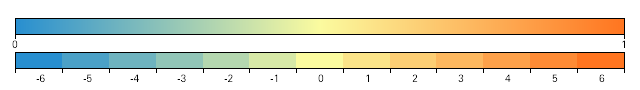

isolum



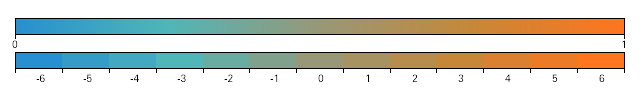

isorainbow



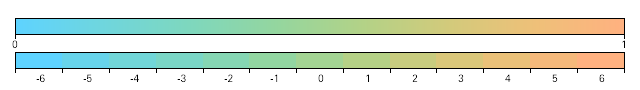

cubelaw



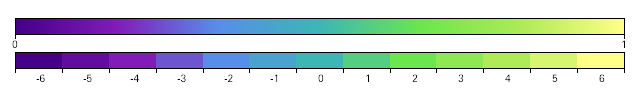

cubelaw2



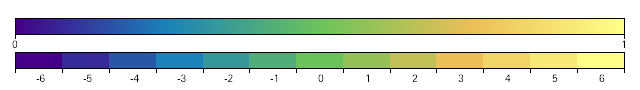

smoothheat



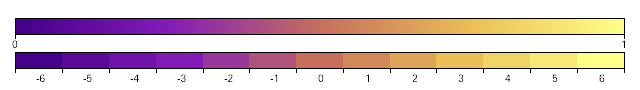

coolwarm



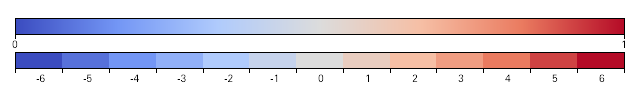

spectral



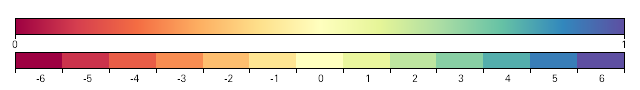

drywet



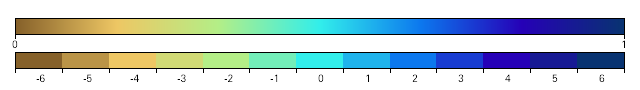

elevation



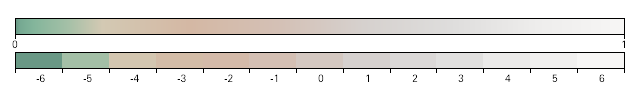

dem1



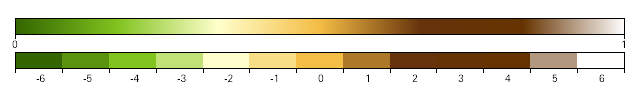

dem2



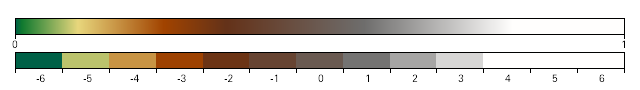

dem3



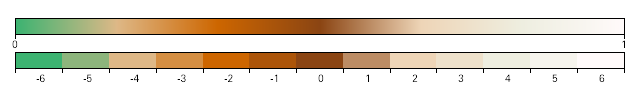

dem4



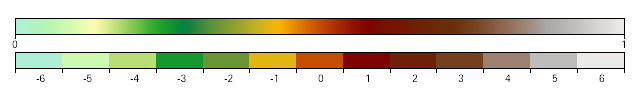

ocean



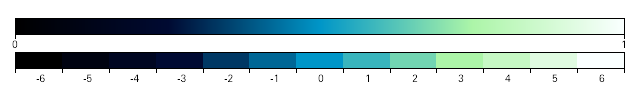

bathy



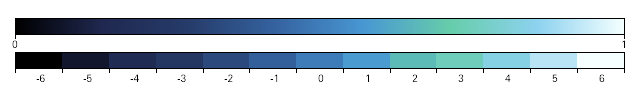

seafloor



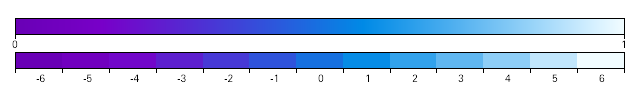

abyss



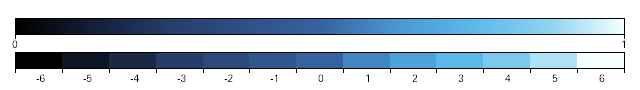

ibcso



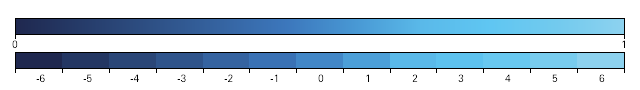

gebco



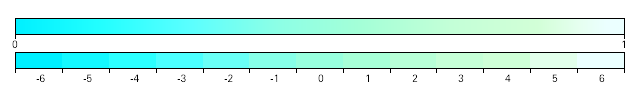

topo



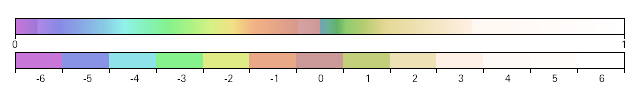

sealand



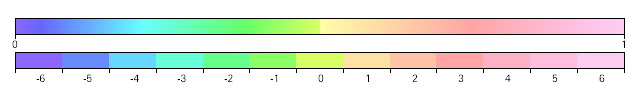

nighttime



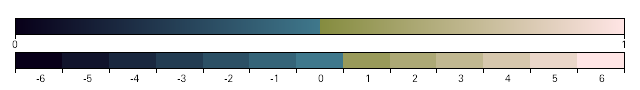

world



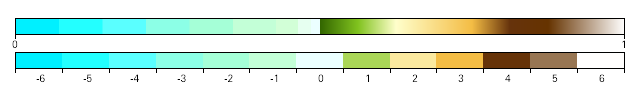

geo



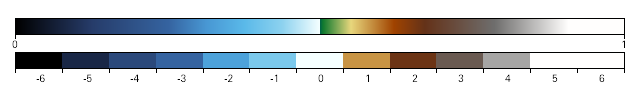

terra



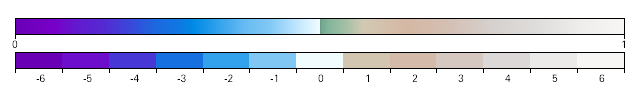

relief



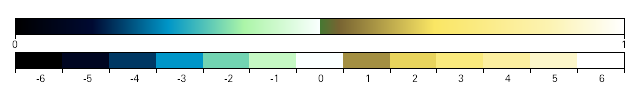

globe



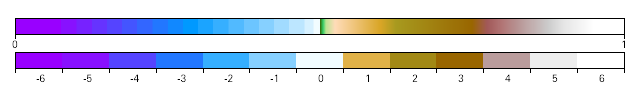

earth



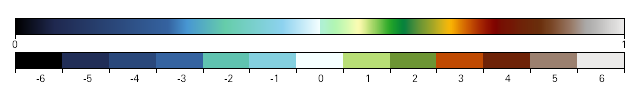

etopo1



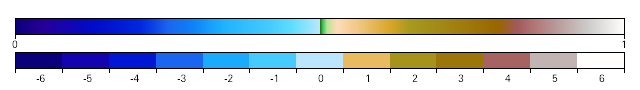

cubhelix



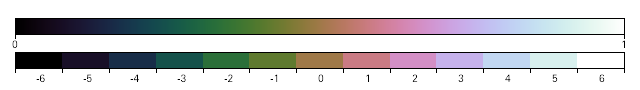

hot



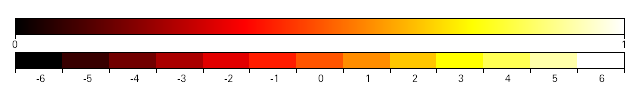

cool



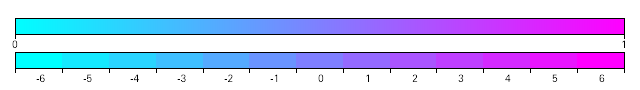

copper



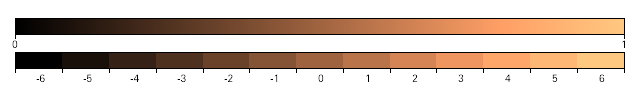

gray



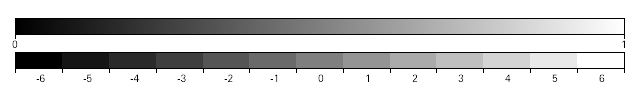

split



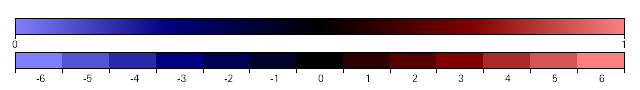

polar



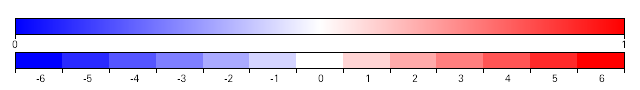

red2green



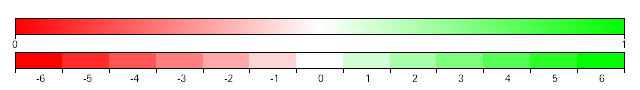

paired



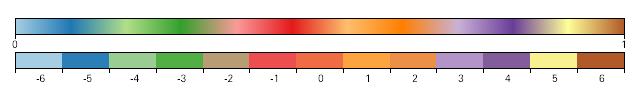

categorical



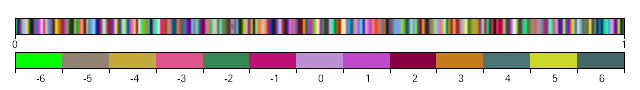

haxby



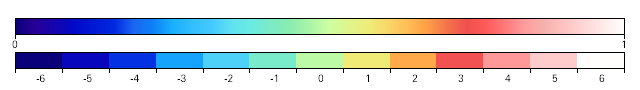

jet



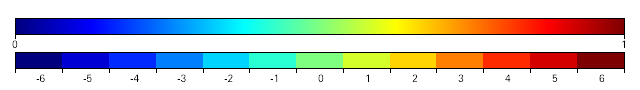

panoply



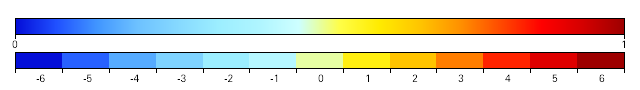

no_green



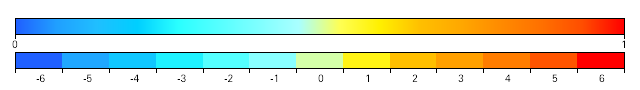

wysiwyg



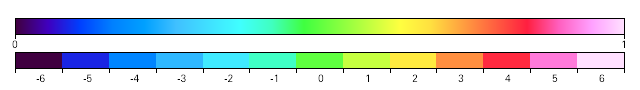

seis



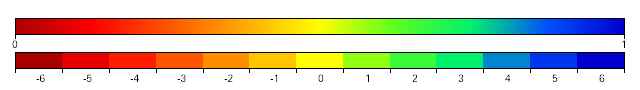

rainbow



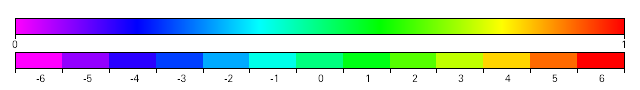

nih



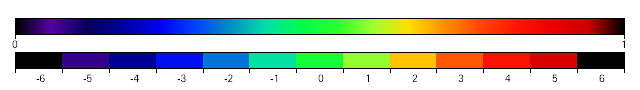

In [1]:
#Plot each map in the list
for name in maps:
    print(name)
    #Load as continuous colourmap
    cbar1.colourmap(name)
    #Load as discrete colourmap
    cbar2.colourmap(name, discrete=True, range=[-6,6])
    lv.display(resolution=[640,90], transparent=True)